# Apprentissage Supervisé
HAMAT Abdoulaye, 2021446
GLASS Philippe, 2007698

## Feature Engineering et Classification
Ce TP a pour but d'étudier différentes méthodes de classification supervisée sur des données présentant diverses structures : numériques, catégorielles et textuelles.

### Chargement des données

In [1]:
import numpy as np
np.set_printoptions(threshold=1000000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_score, accuracy_score, roc_auc_score
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./credit_scoring.csv', sep=';')
X = data.iloc[:, 0:-1].values
labels = data.iloc[:, 13].values
nom_cols = data.columns

n_zeros = np.histogram(labels, bins=2)[0][0]
n_ones = np.histogram(labels, bins=2)[0][-1]

print("Nombre de donnée, Dimensions : ",X.shape)
print("Nombre d'entrée 0 : ", n_zeros, " (", round(n_zeros*100/len(labels), 2),"%)")
print("Nombre d'entrée 1 : ", n_ones, " (", round(n_ones*100/len(labels), 2),"%)")
print()
X_train, X_test, labels_train, labels_test = train_test_split(X, labels, test_size = 0.5, random_state=1)
print("Taille du jeu d'entrainement", X_train.shape[0], "échantillons")
print("Taille du jeu de test : ", X_test.shape[0],"échantillons")

Nombre de donnée, Dimensions :  (4375, 13)
Nombre d'entrée 0 :  1216  ( 27.79 %)
Nombre d'entrée 1 :  3159  ( 72.21 %)

Taille du jeu d'entrainement 2187 échantillons
Taille du jeu de test :  2188 échantillons


Le jeu de données contient plus de 4000 entrées majoritairement de classe 1 (environ 70%). Nous avons donc divisé l'ensemble de données en un dataset de test, et un dataset d'entrainement.

### Apprentissage et évaluation de modèles
On commence par implémenter un arbre de décision de type CART sur les données d'entrainement, ainsi qu'un algorithme des K plus proches voisins.

In [3]:
from sklearn.tree import DecisionTreeClassifier

def tree(X_train, labels_train, X_test, labels_test) :
    """Créer et évalue un arbre CART sur les données passées en argument"""
    
    clf = DecisionTreeClassifier(random_state=1) # Création arbre
    clf.fit(X_train, labels_train)               # Entrainement

    prediction = clf.predict(X_test) # Evaluation
    correct = np.equal(prediction, labels_test).sum()
    print("Arbre CART")
    print("\t Accuracy : ", round(accuracy_score(labels_test, prediction)*100, 2),"%")
    print("\t Rappel : ", round(recall_score(labels_test, prediction)*100, 2), "%")
    print("\t Précision : ", round(precision_score(labels_test, prediction)*100, 2), "%")
    print("\t AUROC : ", round(roc_auc_score(labels_test, prediction), 2))
tree(X_train, labels_train, X_test, labels_test)

Arbre CART
	 Accuracy :  72.71 %
	 Rappel :  79.92 %
	 Précision :  81.94 %
	 AUROC :  0.67


L'algorithme CART permet de construire un arbre de classement binaire donnant une classe correcte dans 70%. Pour notre cas, on s'intéressera particulièrement à la précision :
$$\text{Précision} = \frac{\text{Nombre de clients correctement identifiés comme solvable}}{\text{Nombre de clients identifiés comme solvable}}$$

Si la précision est faible, cela indique que le classificateur considère des clients qui ne rembourseront pas leurs crédits comme solvables, ce qui qui est préjudiciable pour la banque. Une précision de 82% est assez satisfaisante. Nous allons faire la même expérience avec l'algorithme des K plus proches voisins (KNN).

In [4]:
from sklearn.neighbors import KNeighborsClassifier

def knn(X_train, labels_train, X_test, labels_test):
    """Créer et évalue un KNN sur les données passées en argument"""
    clustering = KNeighborsClassifier(n_neighbors=5) # Création du classifier
    clustering.fit(X_train, labels_train)            # Entrainement

    prediction = clustering.predict(X_test)  # Evaluation
    correct = np.equal(prediction, labels_test).sum()
    print("K plus proche voisins")
    print("\t Accuracy : ", round(accuracy_score(labels_test, prediction)*100, 2),"%")
    print("\t Rappel : ", round(recall_score(labels_test, prediction)*100, 2), "%")
    print("\t Précision : ", round(precision_score(labels_test, prediction)*100, 2), "%")
    print("\t AUROC : ", round(roc_auc_score(labels_test, prediction), 2))
knn(X_train, labels_train, X_test, labels_test)

K plus proche voisins
	 Accuracy :  72.49 %
	 Rappel :  88.19 %
	 Précision :  77.1 %
	 AUROC :  0.6



  <table border="0" cellpadding="0" cellspacing="0" id="sheet0" class="sheet0 gridlines">
        <col class="col0">
        <col class="col1">
        <col class="col2">
        <tbody>
          <tr class="row0">
            <td class="column0 style1 null"></td>
            <td class="column1 style1 s">Class_0</td>
            <td class="column2 style1 s">Class_1</td>
          </tr>
          <tr class="row1">
            <td class="column0 style1 s">Count</td>
            <td class="column1 style2 s">284315</td>
              <td class="column2 style3 s"><strong>492</strong></td>
          </tr>
          <tr class="row2">
            <td class="column0 style1 s">mean</td>
            <td class="column1 style1 s">88.29</td>
              <td class="column2 style4 s"><strong>122.21</strong></td>
          </tr>
          <tr class="row3">
            <td class="column0 style1 s">std</td>
              <td class="column1 style5 s"><strong>250.10</strong></td>
            <td class="column2 style1 s">256,68</td>
          </tr>
          <tr class="row4">
            <td class="column0 style1 s">min</td>
            <td class="column1 style1 s">0</td>
              <td class="column2 style3 s"><strong>0</strong></td>
          </tr>
          <tr class="row4">
            <td class="column0 style1 s">25%</td>
            <td class="column1 style1 s">5.65</td>
              <td class="column2 style3 s"><strong>1</strong></td>
          </tr>
          <tr class="row4">
            <td class="column0 style1 s">50%</td>
            <td class="column1 style1 s">22</td>
              <td class="column2 style3 s"><strong>9.25</strong></td>
          </tr>
          <tr class="row4">
            <td class="column0 style1 s">75%</td>
            <td class="column1 style1 s"> 77.05</td>
              <td class="column2 style3 s"><strong>105.89</strong></td>
          </tr>
          <tr class="row4">
            <td class="column0 style1 s">max</td>
            <td class="column1 style1 s">25691.1</td>
              <td class="column2 style3 s"><strong>2125.87</strong></td>
          </tr>
        </tbody>
    </table>


In [5]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Calcul du scaler
scaler = StandardScaler()
scaler.fit(X_train)

# Rescaling des données
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

# Evaluation des performances
tree(X_train_norm, labels_train, X_test_norm, labels_test)
knn(X_train_norm, labels_train, X_test_norm, labels_test)

Arbre CART
	 Accuracy :  72.71 %
	 Rappel :  80.11 %
	 Précision :  81.82 %
	 AUROC :  0.67
K plus proche voisins
	 Accuracy :  75.27 %
	 Rappel :  85.92 %
	 Précision :  81.06 %
	 AUROC :  0.67


Nous constatons que la normalisation n'a pas beaucoup d'effets sur l'arbre, ce qui est logique étant donné sa structure. Cependant, elle semble améliorer légèrement les KNN qui dépendent plus de la taille des features : le calcul de la distance est fortement impacté par la variance des variables. Par conséquent, la normalisation des données permet de faire ressortir des informations masquées par les attributs trop étendus.

<table border="0" cellpadding="0" cellspacing="0" id="sheet0" class="sheet0 gridlines">
        <col class="col0">
        <col class="col1">
        <col class="col2">
        <tbody>
          <tr class="row0">
            <td class="column0 style1 null"></td>
            <td class="column1 style1 s">KNN sans normalisation</td>
            <td class="column2 style1 s">KNN avec normalisation</td>
          </tr>
          <tr class="row1">
            <td class="column0 style1 s">Accuracy</td>
            <td class="column1 style2 s">72.5%</td>
              <td class="column2 style3 s"><strong>75.3%</strong></td>
          </tr>
          <tr class="row2">
            <td class="column0 style1 s">précision</td>
            <td class="column1 style1 s">77.1%</td>
              <td class="column2 style4 s"><strong>81.0%</strong></td>
          </tr>
          <tr class="row3">
            <td class="column0 style1 s">Rappel</td>
              <td class="column1 style5 s"><strong>88.2%</strong></td>
            <td class="column2 style1 s">85.9%</td>
          </tr>
          <tr class="row4">
            <td class="column0 style1 s">Auroc</td>
            <td class="column1 style1 s">0.6</td>
              <td class="column2 style3 s"><strong>0.67</strong></td>
          </tr>
        </tbody>
    </table>

###  Création de nouvelles variables caractéristiques
Nous allons utiliser l'ACP (analyse en composantes principales) pour mettre en évidence des combinaisons linéaires entre les colonnes et donc réduire le nombre d'axes. Cela pourrait éventuellement améliorer les performances des classifieurs :

In [6]:
from sklearn.decomposition import PCA

pca = PCA(3)
X_train_pca = pca.fit_transform(X_train_norm)
X_train_aug = np.concatenate((X_train_norm, X_train_pca), axis=1)

X_test_pca = pca.transform(X_test_norm)
X_test_aug = np.concatenate((X_test_norm, X_test_pca), axis=1)

tree(X_train_aug, labels_train, X_test_aug, labels_test)
knn(X_train_aug, labels_train, X_test_aug, labels_test)

Arbre CART
	 Accuracy :  73.63 %
	 Rappel :  79.55 %
	 Précision :  83.28 %
	 AUROC :  0.69
K plus proche voisins
	 Accuracy :  75.64 %
	 Rappel :  86.62 %
	 Précision :  81.04 %
	 AUROC :  0.67


Les résultats nous montrent que le PCA améliore les performances générales des deux algorithmes.

<table border="0" cellpadding="0" cellspacing="0" id="sheet0" class="sheet0 gridlines">
        <col class="col0">
        <col class="col1">
        <col class="col2">
        <col class="col3">
        <col class="col4">
        <tbody>
          <tr class="row0">
            <td class="column0 style1 null"></td>
            <td class="column1 style1 s">Accuracy</td>
            <td class="column2 style1 s">Rappel</td>
            <td class="column3 style1 s">Précision</td>
            <td class="column4 style1 s">Auroc</td>
          </tr>
          <tr class="row1">
            <td class="column0 style1 s">CART sans PCA</td>
            <td class="column1 style2 s">72.5%</td>
              <td class="column2 style4 s"><strong>80.0%</strong></td>
            <td class="column3 style1 s">77.1%</td>
            <td class="column4 style1 s">0.67</td>
          </tr>
          <tr class="row2">
            <td class="column0 style1 s">CART avec PCA</td>
              <td class="column1 style3 s"><strong>73.6%</strong></td>
            <td class="column2 style5 s">79.5%</td>
              <td class="column3 style3 s"><strong>83.3%</strong></td>
              <td class="column4 style3 s"><strong>0.69</strong></td>
          </tr>
          <tr class="row3">
            <td class="column0 style1 s">KNN sans PCA</td>
            <td class="column1 style6 s">72.5%</td>
              <td class="column2 style3 s"><strong>88.2%</strong></td>
            <td class="column3 style1 s">77.1%</td>
            <td class="column4 style1 s">0.6</td>
          </tr>
          <tr class="row4">
            <td class="column0 style1 s">KNN avec PCA</td>
              <td class="column1 style3 s"><strong>75.6%</strong></td>
            <td class="column2 style7 s">86.6%</td>
              <td class="column3 style4 s"><strong>81.0%</strong></td>
              <td class="column4 style3 s"><strong>0.67</strong></td>
          </tr>
        </tbody>
</table>

### Sélection de variables
L'utilisation d'un Random-Forest permet d'identifier les variables les plus pertinentes vis-à-vis de la classification. On va donc étudier l'intérêt de chaque feature pour réduire l'impureté de chaque noeud.

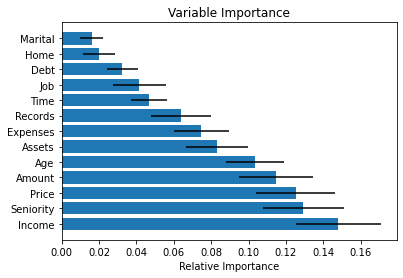

In [7]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train_norm, labels_train)

importances=clf.feature_importances_

std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)
sorted_idx = np.argsort(importances)[::-1]
features =nom_cols

padding = np.arange(X_train_norm.size/len(X_train_norm)) + 0.5
plt.barh(padding, importances[sorted_idx],xerr=std[sorted_idx], align='center')
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

Les variables les plus importantes pour la classification sont le revenu et l'ancienneté alors que le mariage et le fait de posséder une maison influence peu. On va maintenant chercher à déduire le nombre de features minimum pour classer au mieux les données.

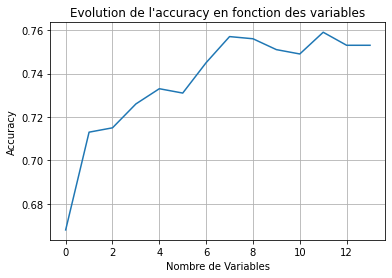

In [8]:
from time import time_ns

KNN=KNeighborsClassifier(n_neighbors=5)
scores=np.zeros(X_train_norm.shape[1]+1)
for f in np.arange(0, X_train_norm.shape[1]+1):
    X1_f = X_train_norm[:,sorted_idx[:f+1]]
    X2_f = X_test_norm[:,sorted_idx[:f+1]]
    KNN.fit(X1_f,labels_train)
    YKNN=KNN.predict(X2_f)
    scores[f]=np.round(accuracy_score(labels_test,YKNN),3)

plt.plot(scores)
plt.xlabel("Nombre de Variables")
plt.ylabel("Accuracy")
plt.title("Evolution de l'accuracy en fonction des variables")
plt.grid()
plt.show()

On se limite aux 7 premières variables (premier décrochage da la courbe) : *Income*, *Seniority*, *Price*, *Amount*, *Age*, *Assets* et *Expense*. On peut procéder de même avec la classification en arbre, ce qui donne les résultats ci-dessous :

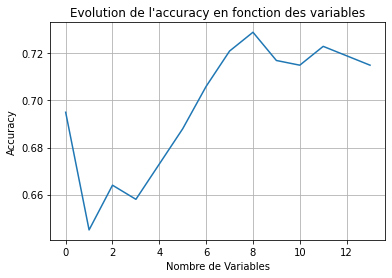

In [9]:
tree=DecisionTreeClassifier()
scores=np.zeros(X_train_norm.shape[1]+1)
for f in np.arange(0, X_train_norm.shape[1]+1):
    X1_f = X_train_norm[:,sorted_idx[:f+1]]
    X2_f = X_test_norm[:,sorted_idx[:f+1]]
    tree.fit(X1_f,labels_train)
    Ytree=tree.predict(X2_f)
    scores[f]=np.round(accuracy_score(labels_test,Ytree),3)

plt.plot(scores)
plt.xlabel("Nombre de Variables")
plt.ylabel("Accuracy")
plt.title("Evolution de l'accuracy en fonction des variables")
plt.grid()
plt.show()

Cette étude nous a permis d'adapter le nombre de variables sans sacrifier l'accuracy. Cela peut être intéressant si le nombre de *features* est trop grand et que l'on souhaite réduire le temps de calcul sans impacter les performances.

### Paramétrage des classifieurs
On doit maintenant régler les paramètres de chacun des algorithmes pour obtenir les meilleures performances possibles. Pour cela, on va utiliser la fonctionnalité de SKLearn qui permet d'explorer rapidement différents paramètres.

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

parameters = {"min_samples_leaf" : [2, 5, 10],
             'max_depth' : [None, 2, 4, 6],
             "max_features" : [None, 2, 4, 6, 8]}
scoring = {'AUC': 'roc_auc','Accuracy': make_scorer(accuracy_score)}

gs = GridSearchCV(DecisionTreeClassifier(random_state=1),
                  param_grid=parameters,
                  scoring=scoring, refit='AUC', return_train_score=True)

gs.fit(X, labels)
results = gs.cv_results_
best = [results["params"][0], round(results['mean_test_Accuracy'][0]*100, 2)]
for i in range(len(results['mean_test_Accuracy'])):
    # print(results["params"][i], " : ", round(results['mean_test_Accuracy'][i]*100, 2), "%")
    if round(results['mean_test_Accuracy'][i]*100, 2) > best[1]:
        best = [results["params"][i], round(results['mean_test_Accuracy'][i]*100, 2)]
print("\n Best : ", best)


 Best :  [{'max_depth': 4, 'max_features': 6, 'min_samples_leaf': 2}, 77.33]


L'algorithme ci-dessus nous donne les meilleurs paramètres pour la classification en arbres. Il affiche seulement le meilleur résultat, mais en analysant les performances détaillées : le paramètre min_samples_leaf n'influe que très peu sur la précision, contrairement au paramètre max_depth qui influe beaucoup plus.
On effectue la même opération avec l'algorithme des KNN :

In [11]:
parameters = {'n_neighbors':range(5, 20, 2),
             "p" : [1, 2],}
scoring = {'AUC': 'roc_auc','Accuracy': make_scorer(accuracy_score)}

gs = GridSearchCV(KNeighborsClassifier(),
                  param_grid=parameters,
                  scoring=scoring, refit='AUC', return_train_score=True)

gs.fit(X, labels)
results = gs.cv_results_

best = [results["params"][0], round(results['mean_test_Accuracy'][0]*100, 2)]
for i in range(len(results['mean_test_Accuracy'])):
    # print(results["params"][i], " : ", round(results['mean_test_Accuracy'][i]*100, 2), "%")
    if round(results['mean_test_Accuracy'][i]*100, 2) > best[1]:
        best = [results["params"][i], round(results['mean_test_Accuracy'][i]*100, 2)]
print("\n Best: ", best)


 Best:  [{'n_neighbors': 17, 'p': 1}, 73.78]


Nous constatons sans surprise que la précision est meilleure lorsque le nombre de voisins augmente mais nous constatons également que la distance de Manhattan donne un léger avantage par rapport à la norme euclidienne. 
### Pipeline
L'ensemble de la procédure a été stockée dans un pipeline puis enregistrée dans un fichier *save_pip.p*. Cela permet de recharger rapidement le classifieur sans avoir à ré-entrainer le modèle. 

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
import pickle
scaler = StandardScaler()
pca = PCA(3)

sub_pip = FeatureUnion([("pca", Pipeline((["scale", scaler], ["pca", pca]))), ("scaler", scaler)])

pipeline = Pipeline([('ss',StandardScaler()),
                    ('classifieur',KNeighborsClassifier(n_neighbors=17))
              ])
pipeline.fit(X_train, labels_train)
pickle.dump(pipeline, open( "save_pip.p", "wb" ))
pipeline = pickle.load(open("save_pip.p", "rb"))
prediction = pipeline.predict(X_test)
print("Accuracy : ", round(accuracy_score(labels_test, prediction)*100, 2),"%")

Accuracy :  77.51 %


Le code ci-dessus permet  d'enregistrer puis de recharger un modèle entrainé.
### Comparaison de plusieurs algorithmes
Pour comparer les différents algorithmes, nous utilisons plusieurs métriques, : l'accuracy, l'aire sur la courbe AUC qui doit être proche de 1, le temps de calcul nécessaire et la précision. 

In [13]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import cross_validate , KFold


def run_classifiers(clfs, X, Y):
    kf = KFold(n_splits=10, shuffle=True, random_state=0)
    kf2 = KFold(n_splits=5, shuffle=True, random_state=0)
    for i in clfs:
        clf = clfs[i]
        cv = cross_validate(clf, X, Y, cv=kf, scoring=scoring)
        cv2 = cross_validate(clf, X, Y, cv=kf2, scoring={"Precision" : make_scorer(precision_score)})
        cv_time = cv['fit_time']
        cv_acc = cv['test_Accuracy']
        cv_auc = cv["test_AUC"]
        cv_prec = cv2["test_Precision"]
        print(i, "(", round(np.mean(cv_time)*1000, 1), "ms)")
        print("\t Accuracy :", round(np.mean(cv_acc),2)*100,"+/-", round(np.std(cv_acc)*100,1),"%")
        print("\t AUROC :", round(np.mean(cv_auc),2),"+/-", round(np.std(cv_auc),2))
        print("\t Précision :", round(np.mean(cv_prec),2)*100,"+/-", round(np.std(cv_prec)*100,1),"%")


clfs = {"NBayes" : GaussianNB(),
"Tree" : DecisionTreeClassifier(max_depth=4, max_features=8, min_samples_leaf=10),
"MLP" : MLPClassifier([20, 10]),
"KNN" : KNeighborsClassifier(n_neighbors=19, p=1),
"Bagging" : BaggingClassifier(n_estimators=50),
"Adaboost" : AdaBoostClassifier(n_estimators=50),
"Randomforest" : RandomForestClassifier(n_estimators=50)}

run_classifiers(clfs, X, labels)



NBayes ( 1.4 ms)
	 Accuracy : 77.0 +/- 2.2 %
	 AUROC : 0.79 +/- 0.03
	 Précision : 83.0 +/- 1.3 %
Tree ( 3.0 ms)
	 Accuracy : 77.0 +/- 1.2 %
	 AUROC : 0.77 +/- 0.01
	 Précision : 81.0 +/- 1.4 %
MLP ( 462.9 ms)
	 Accuracy : 70.0 +/- 6.5 %
	 AUROC : 0.71 +/- 0.05
	 Précision : 80.0 +/- 4.4 %
KNN ( 12.6 ms)
	 Accuracy : 74.0 +/- 1.7 %
	 AUROC : 0.69 +/- 0.03
	 Précision : 76.0 +/- 1.3 %
Bagging ( 507.2 ms)
	 Accuracy : 77.0 +/- 1.5 %
	 AUROC : 0.82 +/- 0.02
	 Précision : 82.0 +/- 0.5 %
Adaboost ( 137.2 ms)
	 Accuracy : 79.0 +/- 1.6 %
	 AUROC : 0.83 +/- 0.02
	 Précision : 82.0 +/- 1.2 %
Randomforest ( 185.3 ms)
	 Accuracy : 79.0 +/- 1.9 %
	 AUROC : 0.82 +/- 0.02
	 Précision : 82.0 +/- 0.8 %


Selon les scores obtenus, les algorithmes les plus performants sont Naive Bayes, Adaboost**, RandomForest** et Bagging. Naive Bayes se distingue hautement grâce à sa rapidité et ses excellentes performances. Le perceptron multicouches donne une accuracy plus faible que les autres, mais possède une meilleure précision. 
    <table border="0" cellpadding="0" cellspacing="0" id="sheet0" class="sheet0 gridlines">
        <col class="col0">
        <col class="col1">
        <col class="col2">
        <col class="col3">
        <col class="col4">
        <tbody>
          <tr class="row0">
            <td class="column0 style1 null"></td>
            <td class="column1 style1 s">Accuracy</td>
            <td class="column2 style1 s">Précision</td>
            <td class="column3 style1 s">Auroc</td>
            <td class="column4 style1 s">Time</td>
          </tr>
          <tr class="row1">
            <td class="column0 style1 s">Nbayes</td>
            <td class="column1 style2 s">77.0%</td>
            <td class="column2 style6 s">83.0%</td>
            <td class="column3 style1 s">0.79</td>
            <td class="column4 style1 s">1.5ms</td>
          </tr>
          <tr class="row2">
            <td class="column0 style1 s">CART</td>
            <td class="column1 style2 s">76.0%</td>
            <td class="column2 style6 s">79.0%</td>
            <td class="column3 style7 s">0.77</td>
              <td class="column4 style3 s"><strong>3.6ms</strong></td>
          </tr>
          <tr class="row3">
            <td class="column0 style1 s">MLP</td>
            <td class="column1 style2 s">72.0%</td>
              <td class="column2 style4 s"><strong>80.0%</strong></td>
            <td class="column3 style1 s">0.7</td>
            <td class="column4 style1 s"> 754.8 ms</td>
          </tr>
          <tr class="row4">
            <td class="column0 style1 s">KNN</td>
            <td class="column1 style2 s">74.0%</td>
            <td class="column2 style6 s">76.0%</td>
            <td class="column3 style6 s">0.69</td>
            <td class="column4 style7 s">13.9 ms</td>
          </tr>
          <tr class="row5">
            <td class="column0 style8 s">Bagging</td>
            <td class="column1 style2 s">77.0%</td>
            <td class="column2 style4 s"><strong>83.0%</strong></td>
            <td class="column3 style8 s">0.82</td>
            <td class="column4 style8 s">583.3 ms</td>
          </tr>
          <tr class="row6">
            <td class="column0 style8 s">Adaboost</td>
            <td class="column1 style5 s"><strong>79.0%</strong></td>
             <td class="column2 style4 s"><strong>82.0%</strong></td>
              <td class="column3 style9 s"><strong>0.83</strong></td>
            <td class="column4 style10 s">167.8 ms</td>
          </tr>
          <tr class="row7">
            <td class="column0 style8 s">RandomForest</td>
            <td class="column1 style2 s">78.0%</td>
             <td class="column2 style4 s"><strong>82.0%</strong></td>
            <td class="column3 style8 s">0.82</td>
            <td class="column4 style8 s">218.4 ms</td>
          </tr>
        </tbody>
    </table>

## Apprentissage supervisé : Données hétérogènes
Dans cette partie, nous traitons un jeu des données hétérogènes qui contiennent à la fois des données numériques et des données catégorielles.
### Chargement des données
Nous procédons comme suit :
- Séparation des données numériques des données catégorielles
- Remplacer les données manquantes par des "nan"
- Transformation des labels en booléens

In [14]:
data = pd.read_csv('./credit.data', sep=None)
data_array = data.values
X = data_array[:, 0:-1]
Y = data_array[:, -1]


# Isolation des colonnes numériques
col_cat = [0,3,4,5,6,8,9,11,12]
col_num = [1, 2, 7, 10, 13, 14]

X_numeric = X[:, col_num]
X_numeric[X_numeric=="?"] = np.nan
X_numeric = X_numeric.astype(np.float)

nan_lines = np.isnan(X_numeric).any(axis=1)
X_numeric = X_numeric[~nan_lines]

# Binarisation
Y = np.where(Y=='+', 1, Y)
Y = np.where(Y=='-', 0, Y)
Y = Y.astype(np.int)
Y_numeric = Y[~nan_lines]
print("Taille de l'échantillon : ", X_numeric.shape)

n_zeros = np.histogram(Y_numeric)[0][0]
n_ones = np.histogram(Y_numeric)[0][-1]
print("Nombre d'entrée 0 : ", n_zeros, " (", round(n_zeros*100/len(Y_numeric), 2),"%)")
print("Nombre d'entrée 1 : ", n_ones, " (", round(n_ones*100/len(Y_numeric), 2),"%)")
print("Nombre de lignes avec des données manquantes : ", nan_lines.sum())

Taille de l'échantillon :  (665, 6)
Nombre d'entrée 0 :  367  ( 55.19 %)
Nombre d'entrée 1 :  298  ( 44.81 %)
Nombre de lignes avec des données manquantes :  22


L'ensemble comporte 22 lignes avec des données manquantes et l'échantillon comporte 665 entrées réparties équitablement entre les deux classes.

### Test des algorithmes

On commence par tester les algorithmes de classification sur l'ensemble des données numériques :

In [15]:
clfs = {"NBayes" : GaussianNB(),
"Tree" : DecisionTreeClassifier(),
"MLP" : MLPClassifier([6, 20, 10, 2]),
"KNN" : KNeighborsClassifier(n_neighbors=19, p=1),
"Bagging" : BaggingClassifier(n_estimators=50),
"Adaboost" : AdaBoostClassifier(n_estimators=50),
"Randomforest" : RandomForestClassifier(n_estimators=50)
}
run_classifiers(clfs, X_numeric, Y_numeric)


NBayes ( 0.2 ms)
	 Accuracy : 71.0 +/- 5.8 %
	 AUROC : 0.79 +/- 0.06
	 Précision : 85.0 +/- 8.9 %
Tree ( 0.1 ms)
	 Accuracy : 70.0 +/- 4.5 %
	 AUROC : 0.7 +/- 0.04
	 Précision : 67.0 +/- 6.5 %
MLP ( 280.8 ms)
	 Accuracy : 57.99999999999999 +/- 10.4 %
	 AUROC : 0.62 +/- 0.11
	 Précision : 50.0 +/- 26.6 %
KNN ( 1.6 ms)
	 Accuracy : 68.0 +/- 4.6 %
	 AUROC : 0.75 +/- 0.04
	 Précision : 73.0 +/- 4.7 %
Bagging ( 91.0 ms)
	 Accuracy : 76.0 +/- 5.6 %
	 AUROC : 0.82 +/- 0.05
	 Précision : 81.0 +/- 3.7 %
Adaboost ( 55.9 ms)
	 Accuracy : 79.0 +/- 5.3 %
	 AUROC : 0.85 +/- 0.05
	 Précision : 79.0 +/- 4.2 %
Randomforest ( 61.3 ms)
	 Accuracy : 78.0 +/- 6.4 %
	 AUROC : 0.85 +/- 0.06
	 Précision : 79.0 +/- 4.3 %


Les algorithmes les plus performants sont Adaboost** et Naive Bayes qui donnent une AUROC relativement proche de 1 et une précision bien supérieure aux autres. Les performances du MLP sont étonnantes car à la fois très faibles mais présentant une grande incertitude. On va donc s'intéresser à faire évoluer l'architecture du MLP afin d'obtenir de meilleures performances. Cependant, le temps d'entrainement est trop long pour le rendre intéressant vis-à-vis des autres candidats.

<table border="0" cellpadding="0" cellspacing="0" id="sheet0" class="sheet0 gridlines">
        <colgroup><col class="col0">
        <col class="col1">
        <col class="col2">
        <col class="col3">
        <col class="col4">
        </colgroup><tbody>
          <tr class="row0">
            <td class="column0 style1 null"></td>
            <td class="column1 style1 s">Accuracy</td>
            <td class="column2 style1 s">Précision</td>
            <td class="column3 style1 s">Auroc</td>
            <td class="column4 style1 s">Time</td>
          </tr>
          <tr class="row1">
            <td class="column0 style1 s">Nbayes</td>
            <td class="column1 style2 s">71.0%</td>
              <td class="column2 style4 s"><strong>85.0%</strong></td>
            <td class="column3 style1 s">0.79</td>
            <td class="column4 style3 s"><strong>0.6ms</strong></td>
          </tr>
          <tr class="row2">
            <td class="column0 style1 s">CART</td>
            <td class="column1 style2 s">71.0%</td>
            <td class="column2 style6 s">65.0%</td>
            <td class="column3 style7 s">0.71</td>
            <td class="column4 style7 s">1.3ms</td>
          </tr>
          <tr class="row3">
            <td class="column0 style1 s">MLP</td>
            <td class="column1 style2 s">54.0%</td>
            <td class="column2 style6 s">33.0%</td>
            <td class="column3 style1 s">0.57</td>
            <td class="column4 style1 s">211.4ms</td>
          </tr>
          <tr class="row4">
            <td class="column0 style1 s">KNN</td>
            <td class="column1 style2 s">68.0%</td>
            <td class="column2 style6 s">73.0%</td>
            <td class="column3 style6 s">0.75</td>
            <td class="column4 style3 s"><strong>0.5ms</strong></td>
          </tr>
          <tr class="row5">
            <td class="column0 style8 s">Bagging</td>
            <td class="column1 style2 s">77.0%</td>
            <td class="column2 style6 s">77.0%</td>
            <td class="column3 style8 s">0.83</td>
            <td class="column4 style8 s">62.0ms</td>
          </tr>
          <tr class="row6">
            <td class="column0 style8 s">Adaboost</td>
            <td class="column1 style5 s"><strong>79.0%</strong></td>
            <td class="column2 style6 s">79.0%</td>
            <td class="column3 style9 s"><strong>0.85</strong></td>
            <td class="column4 style10 s">40.8ms</td>
          </tr>
          <tr class="row7">
            <td class="column0 style8 s">RandomForest</td>
            <td class="column1 style2 s">77.0%</td>
            <td class="column2 style6 s">80.0%</td>
            <td class="column3 style8 s">0.84</td>
            <td class="column4 style8 s">37.6ms</td>
          </tr>
        </tbody>
    </table>


### Normalisation des données

In [16]:
scaler = StandardScaler()
Xn_scaled = scaler.fit_transform(X_numeric)
run_classifiers(clfs, Xn_scaled, Y_numeric)

NBayes ( 0.7 ms)
	 Accuracy : 71.0 +/- 5.8 %
	 AUROC : 0.79 +/- 0.06
	 Précision : 85.0 +/- 8.9 %
Tree ( 1.7 ms)
	 Accuracy : 70.0 +/- 4.9 %
	 AUROC : 0.7 +/- 0.04
	 Précision : 66.0 +/- 4.1 %
MLP ( 328.8 ms)
	 Accuracy : 74.0 +/- 9.0 %
	 AUROC : 0.78 +/- 0.11
	 Précision : 49.0 +/- 39.9 %
KNN ( 0.0 ms)
	 Accuracy : 74.0 +/- 6.9 %
	 AUROC : 0.82 +/- 0.04
	 Précision : 87.0 +/- 3.6 %
Bagging ( 93.2 ms)
	 Accuracy : 77.0 +/- 5.3 %
	 AUROC : 0.83 +/- 0.05
	 Précision : 77.0 +/- 3.8 %
Adaboost ( 52.2 ms)
	 Accuracy : 79.0 +/- 5.3 %
	 AUROC : 0.85 +/- 0.05
	 Précision : 79.0 +/- 4.2 %
Randomforest ( 60.4 ms)
	 Accuracy : 78.0 +/- 5.8 %
	 AUROC : 0.84 +/- 0.05
	 Précision : 77.0 +/- 4.6 %


La normalisation semble augmenter les performances des classifieurs "k plus proches voisins" et Perceptron multicouches dont les scores se sont stabilisés. Elle n'a pas eu d'impact significatif sur l'arbre CART, car ce dernier n'est pas influencé par la plage de valeurs de chaque attribut. C'est également le cas pour les classifieurs Bagging, Adaboost et Random-Forest (et ce pour les mêmes raisons).

 <table border="0" cellpadding="0" cellspacing="0" id="sheet0" class="sheet0 gridlines">
        <col class="col0">
        <col class="col1">
        <col class="col2">
        <col class="col3">
        <col class="col4">
        <tbody>
          <tr class="row0">
            <td class="column0 style1 null"></td>
            <td class="column1 style1 s">Accuracy</td>
            <td class="column2 style1 s">Précision</td>
            <td class="column3 style1 s">Auroc</td>
            <td class="column4 style11 null"></td>
          </tr>
          <tr class="row1">
            <td class="column0 style1 s">Nbayes</td>
            <td class="column1 style2 s">71.0%</td>
            <td class="column2 style6 s">85.0%</td>
            <td class="column3 style1 s">0.79</td>
            <td class="column4 style12 null"></td>
          </tr>
          <tr class="row2">
            <td class="column0 style1 s">CART</td>
            <td class="column1 style2 s">71.0%</td>
            <td class="column2 style6 s">66.0%</td>
            <td class="column3 style8 s">0.71</td>
            <td class="column4 style13 null"></td>
          </tr>
          <tr class="row3">
            <td class="column0 style1 s"><strong>MLP</strong></td>
            <td class="column1 style5 s"><strong>73.0%</strong></td>
            <td class="column2 style4 s"><strong>70.0%</strong></td>
            <td class="column3 style3 s"><strong>0.78</strong></td>
            <td class="column4 style11 null"></td>
          </tr>
          <tr class="row4">
            <td class="column0 style1 s"><strong>KNN</strong></td>
            <td class="column1 style5 s"><strong>74.0%</strong></td>
            <td class="column2 style4 s"><strong>87.0%</strong></td>
            <td class="column3 style4 s"><strong>0.82</strong></td>
            <td class="column4 style12 null"></td>
          </tr>
          <tr class="row5">
            <td class="column0 style9 s">Bagging</td>
            <td class="column1 style2 s">77.0%</td>
            <td class="column2 style6 s">77.0%</td>
            <td class="column3 style9 s">0.83</td>
            <td class="column4 style14 null"></td>
          </tr>
          <tr class="row6">
            <td class="column0 style9 s">Adaboost</td>
            <td class="column1 style7 s">79.0%</td>
            <td class="column2 style6 s">79.0%</td>
            <td class="column3 style10 s">0.85</td>
            <td class="column4 style15 null"></td>
          </tr>
          <tr class="row7">
            <td class="column0 style9 s">RandomForest</td>
            <td class="column1 style2 s">77.0%</td>
            <td class="column2 style6 s">80.0%</td>
            <td class="column3 style9 s">0.84</td>
            <td class="column4 style14 null"></td>
          </tr>
        </tbody>
    </table>

### Traitement des données manquantes

La suppression des lignes avec des données manquantes résulte en une perte d'information. On doit donc conserver ces lignes en remplaçant ces données par une valeur bien choisie.

In [17]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer as Imputer

X_cat = np.copy(X[:, col_cat])

for col_id in range(len(col_cat)):
    unique_val, val_idx = np.unique(X_cat[:, col_id], return_inverse=True)
    X_cat[:, col_id] = val_idx
    
imp_cat = Imputer(missing_values=0, strategy='most_frequent')
X_cat[:, range(5)] = imp_cat.fit_transform(X_cat[:, range(5)])


X_num = np.copy(X[:, col_num])
X_num[X_num == '?'] = np.nan
X_num = X_num.astype(float)
imp_num = Imputer(missing_values=np.nan, strategy='mean')
X_num = imp_num.fit_transform(X_num)


Dans notre cas, nous remplaçons les données manquantes selon la procédure suivantes :
- Pour les données catégorielles : on utilise la valeur la plus fréquente dans la colonne
- Pour les données numériques : on utilise la moyenne des *features* sur la colonne

Dans notre cas, le nombre de lignes manquantes est faible par rapport au nombre de lignes dans le fichier. Par conséquent cette procédure influe peu sur les performances.

### Traitement des variables catégorielles et concaténation

Dans la partie précédente, nous nous sommes restreints aux données numériques. Il serait intéressant de trouver une solution pour exploiter les données catégorielles afin de rajouter de l'information dans la base de données.

Pour exploiter les données catégorielles, nous allons nous pencher sur l'encodage One-Hot : il consiste à transformer une variable catégorielle à $m$ modalités en $m$ variables binaires.
Nous pourrons ensuite concaténer les variables encodées en binaire avec les données numériques normalisées et tester à nouveau les classifieurs.

In [18]:
X_cat_bin = OneHotEncoder().fit_transform(X_cat).toarray()

X_num_scale = StandardScaler().fit_transform(X_num)
X_tot = np.concatenate([X_num_scale, X_cat_bin], axis=1)

run_classifiers(clfs, X_tot, Y)

NBayes ( 0.7 ms)
	 Accuracy : 71.0 +/- 6.0 %
	 AUROC : 0.88 +/- 0.04
	 Précision : 88.0 +/- 5.8 %
Tree ( 3.1 ms)
	 Accuracy : 79.0 +/- 3.4 %
	 AUROC : 0.79 +/- 0.03
	 Précision : 78.0 +/- 5.0 %
MLP ( 444.5 ms)
	 Accuracy : 81.0 +/- 9.7 %
	 AUROC : 0.91 +/- 0.04
	 Précision : 67.0 +/- 34.3 %
KNN ( 1.6 ms)
	 Accuracy : 86.0 +/- 4.2 %
	 AUROC : 0.92 +/- 0.04
	 Précision : 88.0 +/- 6.2 %
Bagging ( 120.0 ms)
	 Accuracy : 85.0 +/- 3.2 %
	 AUROC : 0.92 +/- 0.04
	 Précision : 84.0 +/- 7.2 %
Adaboost ( 72.7 ms)
	 Accuracy : 85.0 +/- 4.5 %
	 AUROC : 0.91 +/- 0.04
	 Précision : 81.0 +/- 8.7 %
Randomforest ( 58.6 ms)
	 Accuracy : 87.0 +/- 3.7 %
	 AUROC : 0.93 +/- 0.03
	 Précision : 84.0 +/- 9.6 %


L'utilisation des données catégorielles permet d'améliorer les performances générales de tous les algorithmes d'environ 10% (à l'exception de NBayes). Random-Forest fournit les meilleures performances avec une accuracy de 87% et une AUROC de 0.93. La précision est également satisfaisante.

<table>
<tr><td><th>Données numériques normalisées uniquement </th></td><th>Données complètes</th></tr>
<tr><td width="250px">
<td>
   <table border="0" cellpadding="0" cellspacing="0" id="sheet0" class="sheet0 gridlines">
        <col class="col0">
        <col class="col1">
        <col class="col2">
        <col class="col3">
        <col class="col4">
        <tbody>
          <tr class="row0">
            <td class="column0 style1 null"></td>
            <td class="column1 style1 s">Accuracy</td>
            <td class="column2 style1 s">Précision</td>
            <td class="column3 style1 s">Auroc</td>
            <td class="column4 style11 null"></td>
          </tr>
          <tr class="row1">
            <td class="column0 style1 s">Nbayes</td>
            <td class="column1 style2 s">71.0%</td>
            <td class="column2 style6 s">85.0%</td>
            <td class="column3 style1 s">0.79</td>
            <td class="column4 style12 null"></td>
          </tr>
          <tr class="row2">
            <td class="column0 style1 s">CART</td>
            <td class="column1 style2 s">71.0%</td>
            <td class="column2 style6 s">66.0%</td>
            <td class="column3 style8 s">0.71</td>
            <td class="column4 style13 null"></td>
          </tr>
          <tr class="row3">
            <td class="column0 style1 s">MLP</td>
            <td class="column1 style5 s">73.0%</td>
            <td class="column2 style4 s">70.0%</td>
            <td class="column3 style3 s">0.78</td>
            <td class="column4 style11 null"></td>
          </tr>
          <tr class="row4">
            <td class="column0 style1 s">KNN</td>
            <td class="column1 style5 s">74.0%</td>
            <td class="column2 style4 s">87.0%</td>
            <td class="column3 style4 s">0.82</td>
            <td class="column4 style12 null"></td>
          </tr>
          <tr class="row5">
            <td class="column0 style9 s">Bagging</td>
            <td class="column1 style2 s">77.0%</td>
            <td class="column2 style6 s">77.0%</td>
            <td class="column3 style9 s">0.83</td>
            <td class="column4 style14 null"></td>
          </tr>
          <tr class="row6">
            <td class="column0 style9 s">Adaboost</td>
            <td class="column1 style7 s">79.0%</td>
            <td class="column2 style6 s">79.0%</td>
            <td class="column3 style10 s">0.85</td>
            <td class="column4 style15 null"></td>
          </tr>
          <tr class="row7">
            <td class="column0 style9 s">RandomForest</td>
            <td class="column1 style2 s">77.0%</td>
            <td class="column2 style6 s">80.0%</td>
            <td class="column3 style9 s">0.84</td>
            <td class="column4 style14 null"></td>
          </tr>
        </tbody>
    </table>
    </td>
    <td>
            <table border="0" cellpadding="0" cellspacing="0" id="sheet0" class="sheet0 gridlines">
        <col class="col0">
        <col class="col1">
        <col class="col2">
        <col class="col3">
        <col class="col4">
        <tbody>
          <tr class="row0">
            <td class="column0 style1 null"></td>
            <td class="column1 style1 s">Accuracy</td>
            <td class="column2 style1 s">Précision</td>
            <td class="column3 style1 s">Auroc</td>
            <td class="column4 style11 null"></td>
          </tr>
          <tr class="row1">
            <td class="column0 style1 s">Nbayes</td>
            <td class="column1 style2 s">71.0%</td>
            <td class="column2 style6 s"><strong>88.0%</strong></td>
            <td class="column3 style1 s"><strong>0.88</strong></td>
            <td class="column4 style12 null"></td>
          </tr>
          <tr class="row2">
            <td class="column0 style1 s">CART</td>
            <td class="column1 style2 s"><strong>79.0%</strong></td>
            <td class="column2 style6 s"><strong>78.0%</strong></td>
            <td class="column3 style8 s"><strong>0.80</strong></td>
            <td class="column4 style13 null"></td>
          </tr>
          <tr class="row3">
            <td class="column0 style1 s">MLP</td>
            <td class="column1 style5 s"><strong>76.0%</strong></td>
            <td class="column2 style4 s"><strong>76.0%</strong></td>
            <td class="column3 style3 s"><strong>0.84</strong></td>
            <td class="column4 style11 null"></td>
          </tr>
          <tr class="row4">
            <td class="column0 style1 s">KNN</td>
            <td class="column1 style5 s"><strong>86.0%</strong></td>
            <td class="column2 style4 s"><strong>88.0%</strong></td>
            <td class="column3 style4 s"><strong>0.92</strong></td>
            <td class="column4 style12 null"></td>
          </tr>
          <tr class="row5">
            <td class="column0 style9 s">Bagging</td>
            <td class="column1 style2 s"><strong>86.0%</strong></td>
            <td class="column2 style6 s"><strong>84.0%</strong></td>
            <td class="column3 style9 s"><strong>0.92</strong></td>
            <td class="column4 style14 null"></td>
          </tr>
          <tr class="row6">
            <td class="column0 style9 s">Adaboost</td>
            <td class="column1 style7 s"><strong>85.0%</strong></td>
            <td class="column2 style6 s"><strong>81.0%</strong></td>
            <td class="column3 style10 s"><strong>0.91</strong></td>
            <td class="column4 style15 null"></td>
          </tr>
          <tr class="row7">
            <td class="column0 style9 s">RandomForest</td>
            <td class="column1 style2 s"><strong>87.0%</strong></td>
            <td class="column2 style6 s"><strong>86.0%</strong></td>
            <td class="column3 style9 s"><strong>0.93</strong></td>
            <td class="column4 style14 null"></td>
          </tr>
        </tbody>
    </table>
    </td>
</td><td width="500px">


</td></tr> </table>

## Apprentissage sur données textuelles
On termine cette étude par une analyse de données textuelles. En l'occurrence, on cherche à identifier des spams dans une base de SMS. 
### Chargement des données

In [19]:
data = pd.read_csv("./SMSSpamCollection.data", sep="\t")
data_array = data.values
X = data_array[:,1]
Y = data_array[:,0]

Y = np.where(Y=='spam', 1, Y)
Y = np.where(Y=='ham', 0, Y)
Y = Y.astype(np.int)

print("Taille de l'échantillon : ", X.shape)

n_zeros = np.histogram(Y)[0][0]
n_ones = np.histogram(Y)[0][-1]
print("Nombre d'entrée 0 : ", n_zeros, " (", round(n_zeros*100/len(Y), 2),"%)")
print("Nombre d'entrée 1 : ", n_ones, " (", round(n_ones*100/len(Y), 2),"%)")

Taille de l'échantillon :  (5571,)
Nombre d'entrée 0 :  4824  ( 86.59 %)
Nombre d'entrée 1 :  747  ( 13.41 %)


In [20]:
np.unique(Y)

array([0, 1])

La base contient 5571 SMS dont 13% sont des spams.
### Count Vectorizer
Une première étape consiste à transformer les données textuelles en données numériques afin de pouvoir les exploiter par un algorithme de classification. Pour cela, on propose d'encoder chaque mot présent dans la base grâce à une variable binaire   (*True* si le mot est présent dans la ligne et *False* sinon). Cela produit une matrice dite *sparse* des données. 

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=300,stop_words="english")
X_vec = vectorizer.fit_transform(X)
print(X_vec.shape)


clfs = {"Tree" : DecisionTreeClassifier(),
"MLP" : MLPClassifier([20, 10]),
"KNN" : KNeighborsClassifier(n_neighbors=19, p=1),
"Bagging" : BaggingClassifier(n_estimators=50),
"Adaboost" : AdaBoostClassifier(n_estimators=50),
"Randomforest" : RandomForestClassifier(n_estimators=50)}

run_classifiers(clfs, X_vec.toarray(), Y)

(5571, 300)
Tree ( 426.1 ms)
	 Accuracy : 97.0 +/- 0.9 %
	 AUROC : 0.93 +/- 0.02
	 Précision : 87.0 +/- 0.9 %
MLP ( 2537.5 ms)
	 Accuracy : 98.0 +/- 0.6 %
	 AUROC : 0.97 +/- 0.01
	 Précision : 93.0 +/- 2.0 %
KNN ( 4.6 ms)
	 Accuracy : 90.0 +/- 1.3 %
	 AUROC : 0.94 +/- 0.01
	 Précision : 100.0 +/- 0.0 %
Bagging ( 9612.2 ms)
	 Accuracy : 97.0 +/- 0.9 %
	 AUROC : 0.97 +/- 0.01
	 Précision : 88.0 +/- 1.4 %
Adaboost ( 972.3 ms)
	 Accuracy : 97.0 +/- 0.9 %
	 AUROC : 0.97 +/- 0.01
	 Précision : 94.0 +/- 1.6 %
Randomforest ( 882.9 ms)
	 Accuracy : 97.0 +/- 0.9 %
	 AUROC : 0.98 +/- 0.01
	 Précision : 93.0 +/- 1.9 %


Pour l'instant on utilise la totalité des données, soit une matrice de données *sparse* de taille $5571\times 8711$. Les temps de calculs sont très longs, mais les performances sont excellentes, notamment pour le MLP* qui parvient à atteindre une classification quasi-parfaite.

   <table border="0" cellpadding="0" cellspacing="0" id="sheet0" class="sheet0 gridlines">
        <col class="col0">
        <col class="col1">
        <col class="col2">
        <col class="col3">
        <col class="col4">
        <tbody>
          <tr class="row0">
            <td class="column0 style1 null"></td>
            <td class="column1 style1 s">Accuracy</td>
            <td class="column2 style1 s">Précision</td>
            <td class="column3 style1 s">Auroc</td>
            <td class="column4 style6 s">time</td>
          </tr>
          <tr class="row1">
            <td class="column0 style1 s">CART</td>
            <td class="column1 style2 s">96.0%</td>
            <td class="column2 style3 s">88.0%</td>
            <td class="column3 style1 s">0.93</td>
            <td class="column4 style5 s">129.7ms</td>
          </tr>
          <tr class="row2">
            <td class="column0 style1 s">MLP</td>
            <td class="column1 style4 s"><strong/>98.0%</strong></td>
            <td class="column2 style3 s"><strong>93.0%</strong></td>
            <td class="column3 style5 s">0.97</td>
            <td class="column4 style5 s">6818ms</td>
          </tr>
          <tr class="row3">
            <td class="column0 style5 s">KNN</td>
            <td class="column1 style2 s">90.0%</td>
            <td class="column2 style3 s"><strong>100.0%<strong></td>
            <td class="column3 style5 s">0.93</td>
            <td class="column4 style1 s"><strong>0.9ms</strong></td>
          </tr>
          <tr class="row4">
            <td class="column0 style6 s">Bagging</td>
            <td class="column1 style2 s">97.0%</td>
            <td class="column2 style3 s">89.0%</td>
            <td class="column3 style3 s">0.97</td>
            <td class="column4 style5 s">4439ms</td>
          </tr>
          <tr class="row5">
            <td class="column0 style6 s">Adaboost</td>
            <td class="column1 style2 s">97.0%</td>
            <td class="column2 style3 s">94.0%</td>
            <td class="column3 style6 s">0.97</td>
            <td class="column4 style7 s">1687ms</td>
          </tr>
          <tr class="row6">
            <td class="column0 style6 s">RandomForest</td>
            <td class="column1 style2 s">98.0%</td>
            <td class="column2 style3 s"><strong>93.0%</strong></td>
            <td class="column3 style7 s"><strong>0.98</strong></td>
            <td class="column4 style7 s">1401ms</td>
          </tr>
          <tr class="row7">
            <td class="column0 style8 null"></td>
            <td class="column1 style9 null"></td>
            <td class="column2 style10 null"></td>
            <td class="column3 style8 null"></td>
            <td class="column4 style8 null"></td>
          </tr>
        </tbody>
    </table>

### TF-IDF term weighting
Cette méthode est très gourmande en emplacement mémoire et en temps de calcul (notamment sur des bases de données plus conséquentes). Une solution serait d'utiliser TF-IDF : utiliser TF-IDF plutôt que le nombre d'occurrences de chaque mot dans un document permet de diminuer l'impact des mots à la fois très fréquents dans le texte et portant moins d'informations.

In [22]:
from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer()
X_Tfidf = transformer.fit_transform(X_vec)
run_classifiers(clfs, X_vec.toarray(), Y)

Tree ( 440.1 ms)
	 Accuracy : 96.0 +/- 0.8 %
	 AUROC : 0.93 +/- 0.02
	 Précision : 88.0 +/- 1.2 %
MLP ( 2870.3 ms)
	 Accuracy : 98.0 +/- 0.6 %
	 AUROC : 0.97 +/- 0.02
	 Précision : 93.0 +/- 2.9 %
KNN ( 1.8 ms)
	 Accuracy : 90.0 +/- 1.3 %
	 AUROC : 0.94 +/- 0.01
	 Précision : 100.0 +/- 0.0 %
Bagging ( 9896.7 ms)
	 Accuracy : 97.0 +/- 0.8 %
	 AUROC : 0.97 +/- 0.01
	 Précision : 88.0 +/- 1.6 %
Adaboost ( 856.0 ms)
	 Accuracy : 97.0 +/- 0.9 %
	 AUROC : 0.97 +/- 0.01
	 Précision : 94.0 +/- 1.6 %
Randomforest ( 903.6 ms)
	 Accuracy : 97.0 +/- 1.1 %
	 AUROC : 0.98 +/- 0.01
	 Précision : 93.0 +/- 3.1 %


Nous ne tenons compte que des 1000 termes les plus fréquents et nous retirons les mots anglais qui ne portent pas toujours d'informations.
<table>
<tr><td><th>Count Vectorizer + TF-IDF	 </th></td><th>Count Vectorizer + TF IDF transformer</th></tr>
<tr><td width="250px">
<td>
  <table border="0" cellpadding="0" cellspacing="0" id="sheet0" class="sheet0 gridlines">
        <col class="col0">
        <col class="col1">
        <col class="col2">
        <col class="col3">
        <col class="col4">
        <tbody>
          <tr class="row0">
            <td class="column0 style1 null"></td>
            <td class="column1 style1 s">Accuracy</td>
            <td class="column2 style1 s">Précision</td>
            <td class="column3 style1 s">Auroc</td>
            <td class="column4 style6 s">time</td>
          </tr>
          <tr class="row1">
            <td class="column0 style1 s">CART</td>
            <td class="column1 style2 s">96.0%</td>
            <td class="column2 style3 s">88.0%</td>
            <td class="column3 style1 s">0.93</td>
            <td class="column4 style5 s">129.7ms</td>
          </tr>
          <tr class="row2">
            <td class="column0 style1 s">MLP</td>
            <td class="column1 style4 s"><strong/>98.0%</strong></td>
            <td class="column2 style3 s"><strong>93.0%</strong></td>
            <td class="column3 style5 s">0.97</td>
            <td class="column4 style5 s">6818ms</td>
          </tr>
          <tr class="row3">
            <td class="column0 style5 s">KNN</td>
            <td class="column1 style2 s">90.0%</td>
            <td class="column2 style3 s"><strong>100.0%<strong></td>
            <td class="column3 style5 s">0.93</td>
            <td class="column4 style1 s"><strong>0.9ms</strong></td>
          </tr>
          <tr class="row4">
            <td class="column0 style6 s">Bagging</td>
            <td class="column1 style2 s">97.0%</td>
            <td class="column2 style3 s">89.0%</td>
            <td class="column3 style3 s">0.97</td>
            <td class="column4 style5 s">4439ms</td>
          </tr>
          <tr class="row5">
            <td class="column0 style6 s">Adaboost</td>
            <td class="column1 style2 s">97.0%</td>
            <td class="column2 style3 s">94.0%</td>
            <td class="column3 style6 s">0.97</td>
            <td class="column4 style7 s">1687ms</td>
          </tr>
          <tr class="row6">
            <td class="column0 style6 s">RandomForest</td>
            <td class="column1 style2 s">98.0%</td>
            <td class="column2 style3 s"><strong>93.0%</strong></td>
            <td class="column3 style7 s"><strong>0.98</strong></td>
            <td class="column4 style7 s">1401ms</td>
          </tr>
          <tr class="row7">
            <td class="column0 style8 null"></td>
            <td class="column1 style9 null"></td>
            <td class="column2 style10 null"></td>
            <td class="column3 style8 null"></td>
            <td class="column4 style8 null"></td>
          </tr>
        </tbody>
    </table>

<td>
<table border="0" cellpadding="0" cellspacing="0" id="sheet0" class="sheet0 gridlines">
        <col class="col0">
        <col class="col1">
        <col class="col2">
        <col class="col3">
        <col class="col4">
        <tbody>
          <tr class="row0">
            <td class="column0 style1 null"></td>
            <td class="column1 style1 s">Accuracy</td>
            <td class="column2 style1 s">Précision</td>
            <td class="column3 style1 s">Auroc</td>
            <td class="column4 style6 s">time</td>
          </tr>
          <tr class="row1">
            <td class="column0 style1 s">CART</td>
            <td class="column1 style2 s"><strong>97.0%</strong></td>
            <td class="column2 style3 s">88.0%</td>
            <td class="column3 style1 s">0.93</td>
            <td class="column4 style5 s"><strong>128.5ms</strong></td>
          </tr>
          <tr class="row2">
            <td class="column0 style1 s">MLP</td>
            <td class="column1 style4 s">98.0%</td>
            <td class="column2 style3 s">96.0%</td>
            <td class="column3 style5 s"><strong>0.99</strong></td>
            <td class="column4 style5 s"><strong>2200ms</strong></td>
          </tr>
          <tr class="row3">
            <td class="column0 style5 s">KNN</td>
            <td class="column1 style2 s">88.0%</td>
            <td class="column2 style3 s">100.0%</td>
            <td class="column3 style5 s">0.83</td>
            <td class="column4 style1 s">1.1ms</td>
          </tr>
          <tr class="row4">
            <td class="column0 style6 s">Bagging</td>
            <td class="column1 style2 s">97.0%</td>
            <td class="column2 style3 s">91.0%</td>
            <td class="column3 style3 s">0.98</td>
            <td class="column4 style5 s"><strong>3815ms</strong></td>
          </tr>
          <tr class="row5">
            <td class="column0 style6 s">Adaboost</td>
            <td class="column1 style2 s">97.0%</td>
            <td class="column2 style3 s">94.0%</td>
            <td class="column3 style6 s">0.97</td>
            <td class="column4 style7 s"><strong>157ms</strong></td>
          </tr>
          <tr class="row6">
            <td class="column0 style6 s">RandomForest</td>
            <td class="column1 style2 s">98.0%</td>
            <td class="column2 style3 s">98.0%</td>
            <td class="column3 style7 s">0.99</td>
            <td class="column4 style7 s"><strong>293.9ms</strong></td>
          </tr>
          <tr class="row7">
            <td class="column0 style8 null"></td>
            <td class="column1 style9 null"></td>
            <td class="column2 style10 null"></td>
            <td class="column3 style8 null"></td>
            <td class="column4 style8 null"></td>
          </tr>
        </tbody>
    </table>
</td>
</td><td width="500px">


</td></tr> </table>

L'utilisation de TF-IDF permet de réduire le temps de calcul en n'impactant pas trop les performances générales.

### TruncatedSVD
Afin de limiter l'utilisation de l'espace mémoire et du temps de calcul, on fait appel à un algorithme de réduction de dimension sur le même principe que PCA, mais sans centrer les features. (NB : en cas de crash, il faut relancer le programme bloc par bloc, à partir du chargement des données textuelles)

In [23]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=30)
svd.fit(X_Tfidf)
X_svd = svd.transform(X_Tfidf)


run_classifiers(clfs, X_svd, Y)

Tree ( 109.7 ms)
	 Accuracy : 96.0 +/- 0.7 %
	 AUROC : 0.9 +/- 0.02
	 Précision : 81.0 +/- 2.6 %
MLP ( 1995.8 ms)
	 Accuracy : 97.0 +/- 0.7 %
	 AUROC : 0.98 +/- 0.01
	 Précision : 91.0 +/- 0.7 %
KNN ( 0.7 ms)
	 Accuracy : 96.0 +/- 0.9 %
	 AUROC : 0.97 +/- 0.01
	 Précision : 88.0 +/- 3.2 %
Bagging ( 3041.9 ms)
	 Accuracy : 97.0 +/- 0.9 %
	 AUROC : 0.97 +/- 0.01
	 Précision : 93.0 +/- 0.5 %
Adaboost ( 677.9 ms)
	 Accuracy : 96.0 +/- 0.9 %
	 AUROC : 0.97 +/- 0.01
	 Précision : 88.0 +/- 1.4 %
Randomforest ( 471.0 ms)
	 Accuracy : 97.0 +/- 0.8 %
	 AUROC : 0.97 +/- 0.01
	 Précision : 95.0 +/- 2.1 %


<table>
<tr><td><th>Count Vectorizer + TF-IDF	 </th></td><th>Count Vectorizer + TF IDF transformer + SVDTruncated</th></tr>
<tr><td width="250px">
<td>
<table border="0" cellpadding="0" cellspacing="0" id="sheet0" class="sheet0 gridlines">
        <col class="col0">
        <col class="col1">
        <col class="col2">
        <col class="col3">
        <col class="col4">
        <tbody>
          <tr class="row0">
            <td class="column0 style1 null"></td>
            <td class="column1 style1 s">Accuracy</td>
            <td class="column2 style1 s">Précision</td>
            <td class="column3 style1 s">Auroc</td>
            <td class="column4 style6 s">time</td>
          </tr>
          <tr class="row1">
            <td class="column0 style1 s">CART</td>
            <td class="column1 style2 s"><strong>97.0%</strong></td>
            <td class="column2 style3 s"><strong>88.0%</strong></td>
            <td class="column3 style1 s"><strong>0.93</strong></td>
            <td class="column4 style5 s">128.5ms</td>
          </tr>
          <tr class="row2">
            <td class="column0 style1 s">MLP</td>
            <td class="column1 style4 s"><strong>98.0%</strong></td>
            <td class="column2 style3 s"><strong>96.0%</strong></td>
            <td class="column3 style5 s"><strong>0.99</strong></td>
            <td class="column4 style5 s">2200ms</td>
          </tr>
          <tr class="row3">
            <td class="column0 style5 s">KNN</td>
            <td class="column1 style2 s">88.0%</td>
            <td class="column2 style3 s"><strong>100.0%</strong></td>
            <td class="column3 style5 s">0.83</td>
            <td class="column4 style1 s"><strong>1.1ms</strong></td>
          </tr>
          <tr class="row4">
            <td class="column0 style6 s">Bagging</td>
            <td class="column1 style2 s">97.0%</td>
            <td class="column2 style3 s">91.0%</td>
            <td class="column3 style3 s"><strong>0.98</strong></td>
            <td class="column4 style5 s">3815ms</td>
          </tr>
          <tr class="row5">
            <td class="column0 style6 s">Adaboost</td>
            <td class="column1 style2 s"><strong>97.0%</strong></td>
            <td class="column2 style3 s"><strong>94.0%</strong></td>
            <td class="column3 style6 s">0.97</td>
            <td class="column4 style7 s"><strong>157ms</strong></td>
          </tr>
          <tr class="row6">
            <td class="column0 style6 s">RandomForest</td>
            <td class="column1 style2 s"><strong>98.0%</strong></td>
            <td class="column2 style3 s"><strong>98.0%</strong></td>
            <td class="column3 style7 s"><strong>0.99<strong></td>
            <td class="column4 style7 s">293.9ms</td>
          </tr>
          <tr class="row7">
            <td class="column0 style8 null"></td>
            <td class="column1 style9 null"></td>
            <td class="column2 style10 null"></td>
            <td class="column3 style8 null"></td>
            <td class="column4 style8 null"></td>
          </tr>
        </tbody>
    </table>
</td>

<td>
<table border="0" cellpadding="0" cellspacing="0" id="sheet0" class="sheet0 gridlines">
        <col class="col0">
        <col class="col1">
        <col class="col2">
        <col class="col3">
        <col class="col4">
        <tbody>
          <tr class="row0">
            <td class="column0 style1 null"></td>
            <td class="column1 style1 s">Accuracy</td>
            <td class="column2 style1 s">Précision</td>
            <td class="column3 style1 s">Auroc</td>
            <td class="column4 style6 s">time</td>
          </tr>
          <tr class="row1">
            <td class="column0 style1 s">CART</td>
            <td class="column1 style2 s">96.0%</td>
            <td class="column2 style3 s">84.0%</td>
            <td class="column3 style1 s">0.92</td>
            <td class="column4 style5 s"><strong>52.5ms</strong></td>
          </tr>
          <tr class="row2">
            <td class="column0 style1 s">MLP</td>
            <td class="column1 style4 s">97.0%</td>
            <td class="column2 style3 s">89.0%</td>
            <td class="column3 style5 s">0.97</td>
            <td class="column4 style5 s"><strong>1884ms</strong></td>
          </tr>
          <tr class="row3">
            <td class="column0 style5 s">KNN</td>
            <td class="column1 style2 s"><strong>96.0%</strong></td>
            <td class="column2 style3 s">89.0%</td>
            <td class="column3 style5 s"><strong>0.97</strong></td>
            <td class="column4 style1 s">3.3ms</td>
          </tr>
          <tr class="row4">
            <td class="column0 style6 s">Bagging</td>
            <td class="column1 style2 s">97.0%</td>
            <td class="column2 style3 s"><strong>93.0%</strong></td>
            <td class="column3 style3 s">0.97</td>
            <td class="column4 style5 s"><strong>1455ms</strong></td>
          </tr>
          <tr class="row5">
            <td class="column0 style6 s">Adaboost</td>
            <td class="column1 style2 s">96.0%</td>
            <td class="column2 style3 s">89.0%</td>
            <td class="column3 style6 s">0.97</td>
            <td class="column4 style7 s">353ms</td>
          </tr>
          <tr class="row6">
            <td class="column0 style6 s">RandomForest</td>
            <td class="column1 style2 s">97.0%</td>
            <td class="column2 style3 s">95.0%</td>
            <td class="column3 style7 s">0.98</td>
            <td class="column4 style7 s"><strong>285ms</strong></td>
          </tr>
          <tr class="row7">
            <td class="column0 style8 null"></td>
            <td class="column1 style9 null"></td>
            <td class="column2 style10 null"></td>
            <td class="column3 style8 null"></td>
            <td class="column4 style8 null"></td>
          </tr>
        </tbody>
    </table>
</td>
</td><td width="500px">
</td></tr> </table>

Finalement, les résultats du Truncated SVD sont en **demi-teinte** : la procédure permet effectivement de limiter le temps de calcul de certains algorithmes et d'améliorer légèrement les performances (notamment pour *Bagging* et *KNN*) mais a un **effet négatif** sur d'autres algorithmes.

### Pipeline

On termine par la mise en place d'un Pipeline permettant de traiter des jeux de données textuelles. L'algorithme Random-Forest a été choisi pour ses bonnes performances et son temps d'entrainement réduit.

In [24]:
pipeline = Pipeline([("CountTFVectorizer", CountVectorizer(max_features=300,stop_words="english")), 
                     ("RandomForest", RandomForestClassifier(n_estimators=50))])

kf = KFold(n_splits=10, shuffle=True, random_state=0)
kf2 = KFold(n_splits=5, shuffle=True, random_state=0)

clf = pipeline
cv = cross_validate(clf, X, Y, cv=kf, scoring=scoring)
cv2 = cross_validate(clf, X, Y, cv=kf2, scoring={"Precision" : make_scorer(precision_score)})

cv_time = cv['fit_time']
cv_acc = cv['test_Accuracy']
cv_auc = cv["test_AUC"]
cv_prec = cv2["test_Precision"]

print("Accuracy :", round(np.mean(cv_acc),2)*100,"+/-", round(np.std(cv_acc)*100,1),"%")
print("AUROC :", round(np.mean(cv_auc),2),"+/-", round(np.std(cv_auc),2))
print("Précision :", round(np.mean(cv_prec),2)*100,"+/-", round(np.std(cv_prec)*100,1),"%")


Accuracy : 98.0 +/- 0.9 %
AUROC : 0.98 +/- 0.01
Précision : 92.0 +/- 1.7 %


Ce pipeline permet de séparer efficacement les spams des SMS intéressants. Nous allons le tester avec un autre jeu de données *Yelp* d'avis sur des lieux de tourismes. Le fichier contient 47 371 avis textuels accompagnés d'une note de 1 à 5. On entraine notre Pipeline sur ce jeu de données.

Taille de l'échantillon :  (47371,)


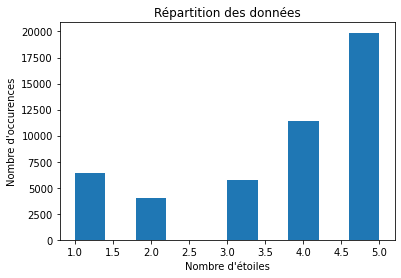

In [25]:
data = pd.read_csv("./yelp-text-by-stars.csv", sep=";", encoding = "ISO-8859-1")
data_array = data.values
X = data_array[:,1]
Y = data_array[:,0]

Y = Y.astype(np.int)
print("Taille de l'échantillon : ", X.shape)
plt.title("Répartition des données")
plt.xlabel("Nombre d'étoiles")
plt.ylabel("Nombre d'occurences")
plt.hist(Y)
plt.show()

Le fichier contient 47 371 avis textuels accompagnés d'une note de 1 à 5. On entraine notre Pipeline sur ce jeu de données.

In [26]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)

cv = cross_validate(pipeline, X, Y, cv=kf, scoring={"Accuracy" : make_scorer(accuracy_score)})
cv_acc = cv['test_Accuracy']
print("Accuracy :", round(np.mean(cv_acc),2)*100,"+/-", round(np.std(cv_acc)*100,1),"%")

Accuracy : 54.0 +/- 0.3 %


La classification doit être faite sur 5 catégories différentes, ce qui la rend plus difficile. Cependant, notre pipeline permet d'obtenir une précision correcte (57 %) en un minimum de lignes de code (mais avec un temps de calcul très grand).

Pour améliorer les performances, on peut également se ramener à une classification binaire. 
On associe la classe 1 aux lieux disposant de 4 ou 5 étoiles.

In [27]:
Y[Y<4] = 0
Y[Y>3]= 1

cv = cross_validate(pipeline, X, Y, cv=kf, scoring={"Accuracy" : make_scorer(accuracy_score)})
cv_acc = cv['test_Accuracy']
print("Accuracy :", round(np.mean(cv_acc),2)*100,"+/-", round(np.std(cv_acc)*100,1),"%")

Accuracy : 81.0 +/- 0.2 %


Effectivement, cela permet d'augmenter l'accuracy d'environ 46%, ce qui n'est pas négligeable, mais nous perdons cependant de l'information dans le procédé.

# Conclusion

Ce TP dresse un tableau assez large des différentes méthodes et techniques pouvant intervenir dans une procédure de
*Machine Learning*. On notera finalement l'importance d'un bon traitement des données en amont de l'algorithme 
d'apprentissage à proprement parlé pour améliorer les performances et le temps de calculs (PCA, Normalisation, 
Encodage OneHot, Imputer). 

Les algorithmes sont également sensibles aux hyperparamètres qu'il faut choisir correctement, c'est pourquoi des 
procédures de tests de ces paramètres peuvent être nécessaires. Enfin, travailler avec des données textuelles augmente
la difficulté de l'apprentissage : il faut savoir trouver la transformation adéquate pour que ces données soient exploitables par les algorithmes classiques.